In [35]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## TU257 - Lab 10-1 - Clustering - Demo Notebook (1)
##### In this notebook we will look at two simple examples of Clustering
##### First will look at generating a simple random data set and apply clustering to it.
##### The second example will look at applying Clustering to the Iris data set
##### ---


### Example 1

In [36]:
#load the libraries we need for this example
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [37]:
#load a simple dataset into a Pandas DF
#
#You will need to change the directory to the location on your computer
df = pd.read_csv("/Users/brendan.tierney/Dropbox/4-Datasets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [38]:
df.shape

(22, 3)

Text(0, 0.5, 'Income($)')

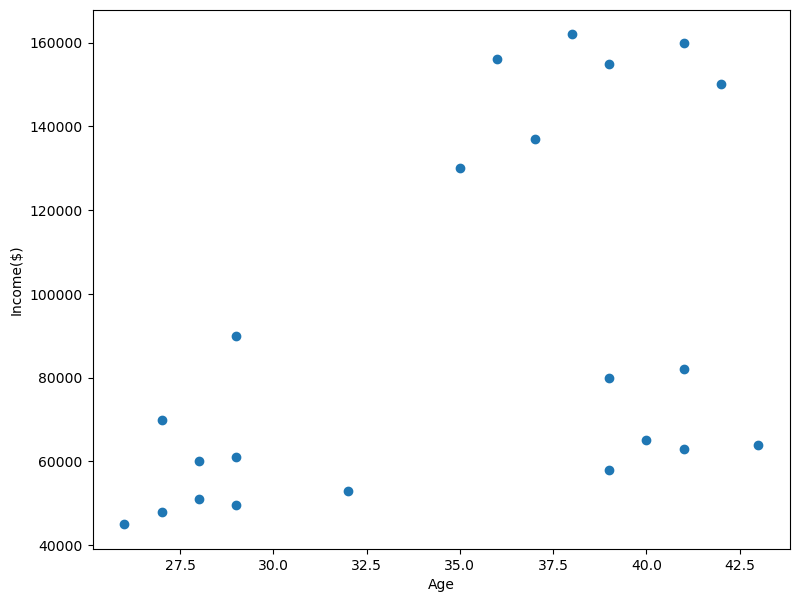

In [39]:
#Let's plot the data
#As 'Name' doesn't have any meanful value/information, we will just plot Age against Income
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

#Visually we can see the data forms some groupings/clusters - it looks like 3 clusters

In [40]:
#Now create a K-means model containing 3 clustsers
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
#display the predicted clusters
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [41]:
#Add the clusters to the original DF, to have all the data together
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [42]:
#We can examine different aspects of the model
#Here we list the Centroids for the 3 clusters
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

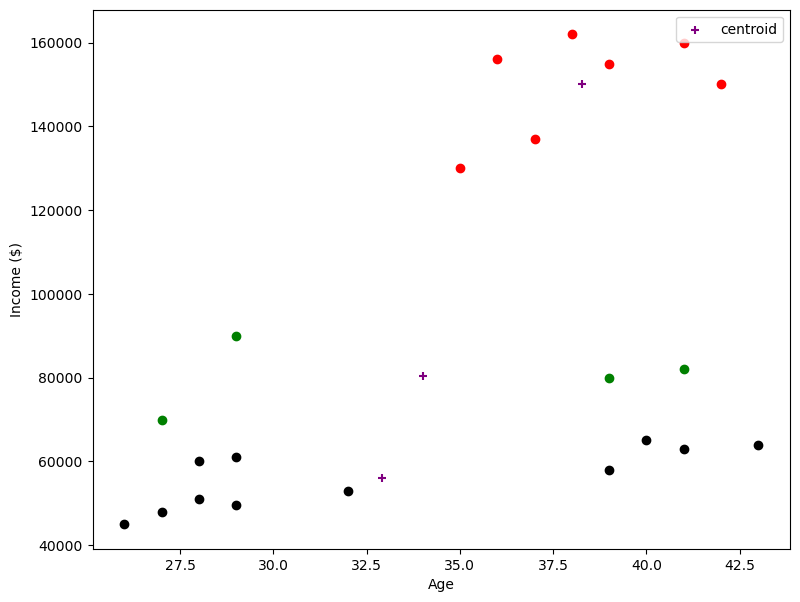

In [43]:
#Now plot the DF and include the clusters
#
#Separte out each Cluster, as this will allow us to format the data in different wasy
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

#Assign each Cluster to have a different colour
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

#Format the centroids to be different to the data points
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
#Add labels for the x and y axis
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [44]:
#The data and these initial results can look a bit odd
#The reason for this is the x-axis and y-axis are using different scales
#This means we need to look at transforming the data to make them on a same/similar scale
#To transform the data we can use a MinMaxScaler to transform the data into the range [0, 1]
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [45]:
#Disply the transformed DF
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

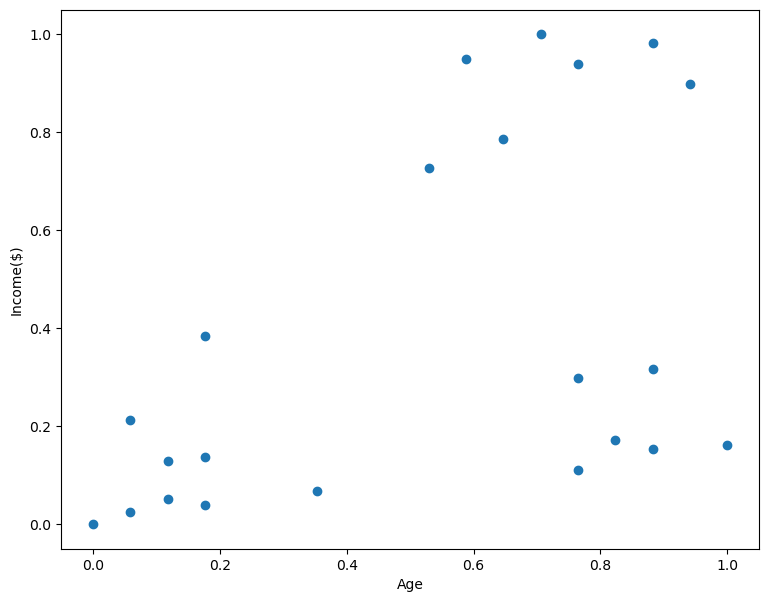

In [46]:
#Plot the transformed data
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [47]:
#Re-run the K-means on the transformed data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [48]:
#Add the cluster number of the DF
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [49]:
#Display the Centroids
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

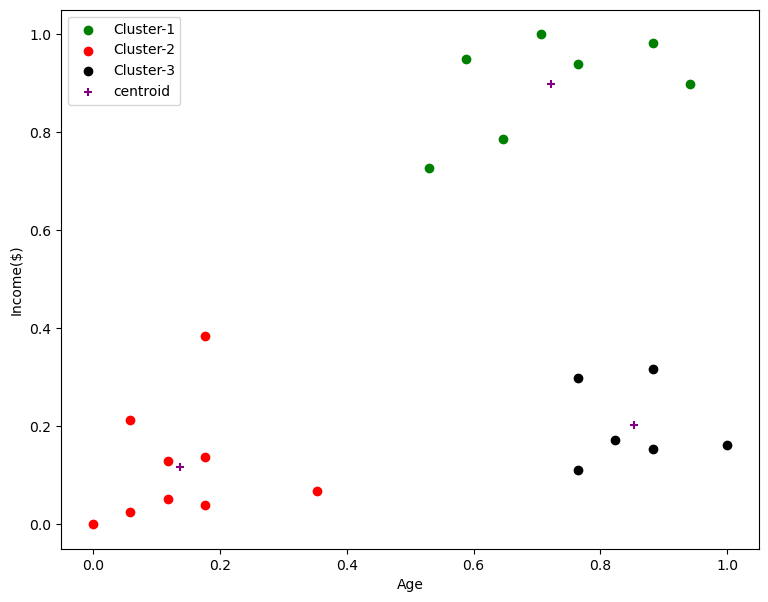

In [50]:
#Plot the transformed data & the centroids
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green', label='Cluster-1')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='Cluster-2')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='Cluster-3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [51]:
#Elbow Method - to determine the optiomal number of clusers
#Run this for Clusters ranging from 1 to 9
wsse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    wsse.append(km.inertia_)

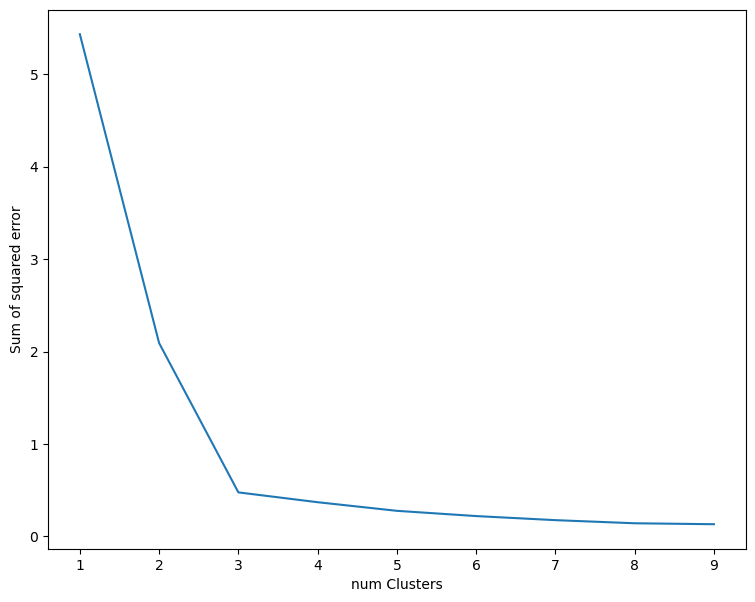

In [52]:
#Plot the Elbow chart
plt.xlabel('num Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,wsse)

#### Exercise: Add additional code to example the centroids created by K-means vs K-means++

#### ----------
#### Example demonstrating different between K-means & K-means++ for selecting initial centroids
#### ----------

[[59.         48.        ]
 [45.36363636 17.09090909]
 [31.14285714 72.42857143]
 [25.28571429 46.85714286]]


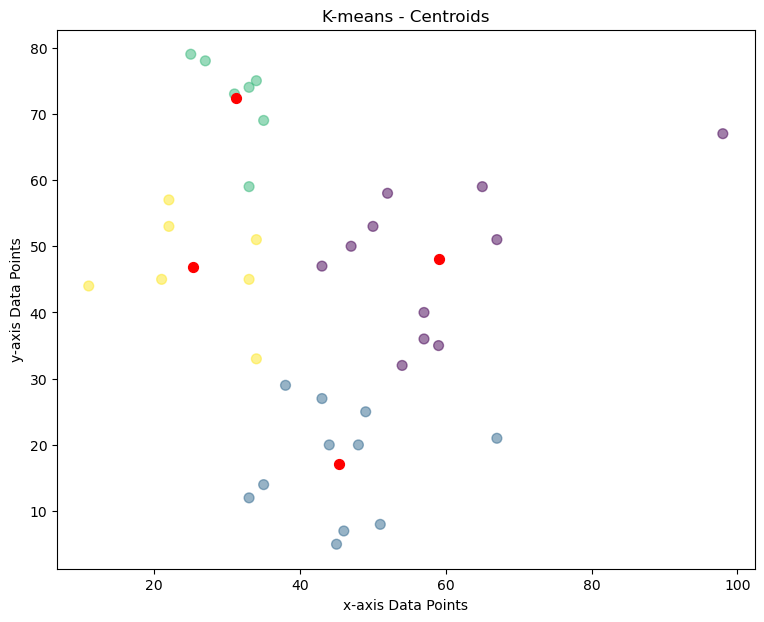

In [53]:
# Example of Centroids using K-means vs K-means++ : num clusters = 4
#This code will run the K-means algorithm

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46,33,67,98,11,34,21],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7,45,21,67,44,33,45]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.rcParams['figure.figsize'] = 9, 7

plt.title('K-means - Centroids')
plt.xlabel('x-axis Data Points')
plt.ylabel('y-axis Data Points')

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()    


[[28.11111111 48.22222222]
 [61.33333333 49.88888889]
 [30.83333333 74.66666667]
 [46.08333333 18.33333333]]


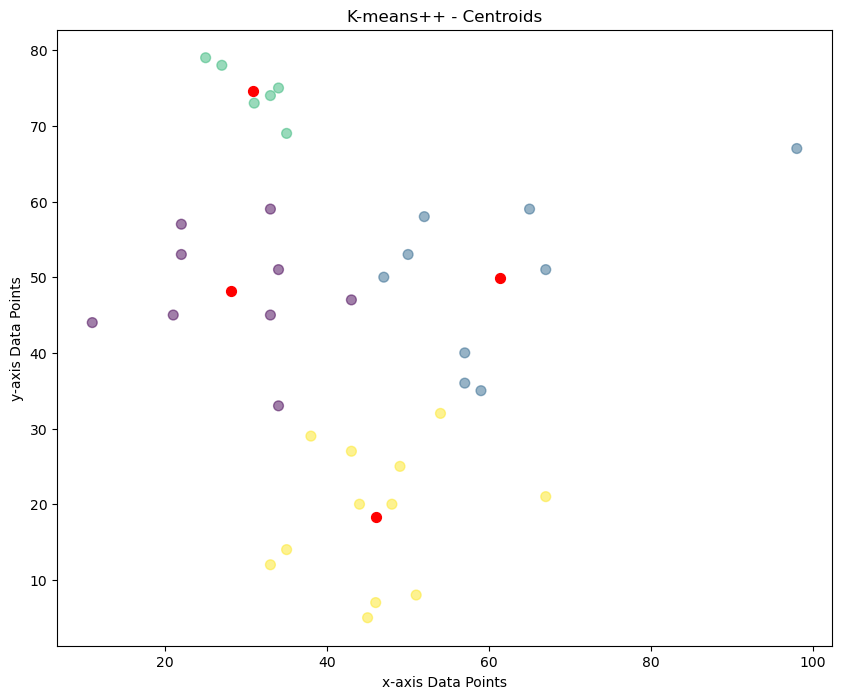

In [54]:
# Example of Centroids using K-means++ : num clusters = 4
kmeans = KMeans(n_clusters=4, init='k-means++').fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.rcParams['figure.figsize'] = 10, 8

plt.title('K-means++ - Centroids')
plt.xlabel('x-axis Data Points')
plt.ylabel('y-axis Data Points')

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Example 2 - Iris Data Set

In [55]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import load_iris

In [56]:
#read the Iris dataset into DF
iris_ds = datasets.load_iris()
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

#display the data
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


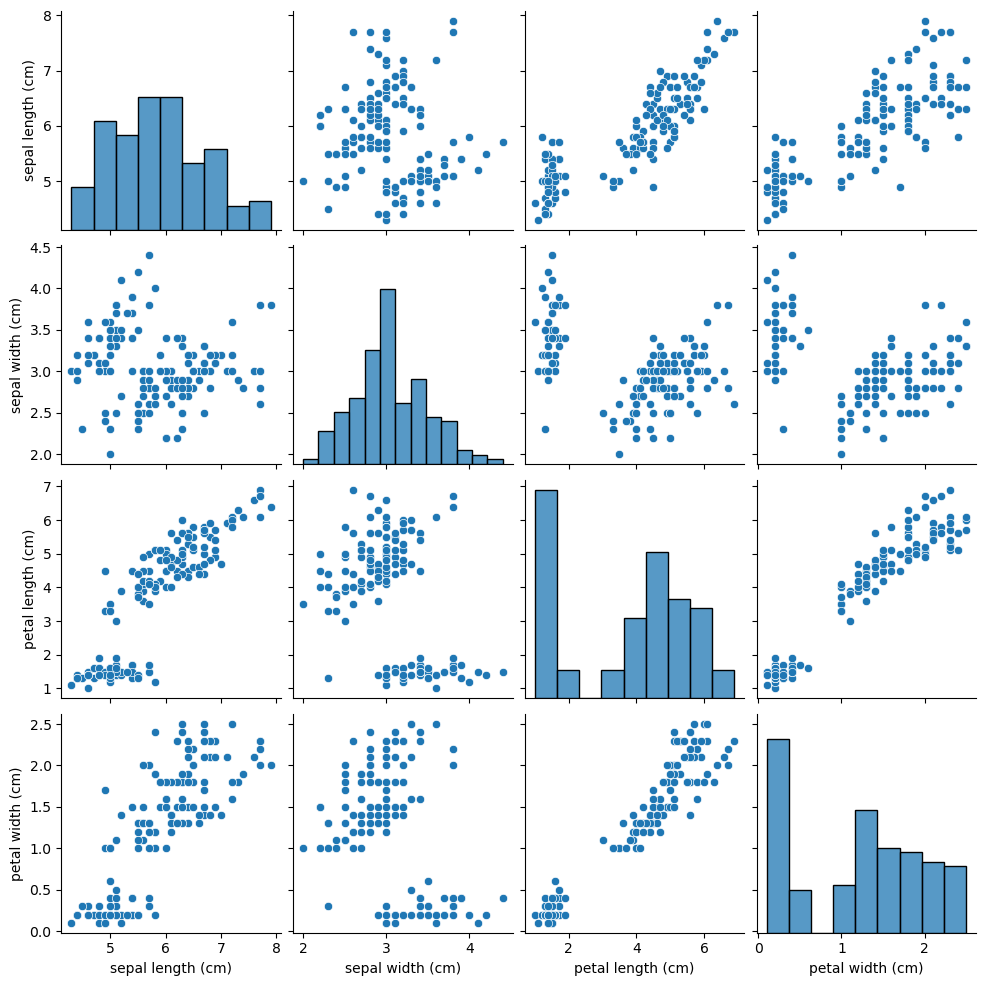

In [58]:
import seaborn as sns

sns.pairplot(df)

### Exercise: Write more code to Analyse the dataset.

In [59]:
#Apply Elbow method and calculate : Using K-means++
wcss = []
K = range(1,11)
for i in K:
    # kmeanModel = KMeans(n_clusters=k)
    # kmeanModel.fit(df)
    # wcss.append(kmeanModel.inertia_)
    
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


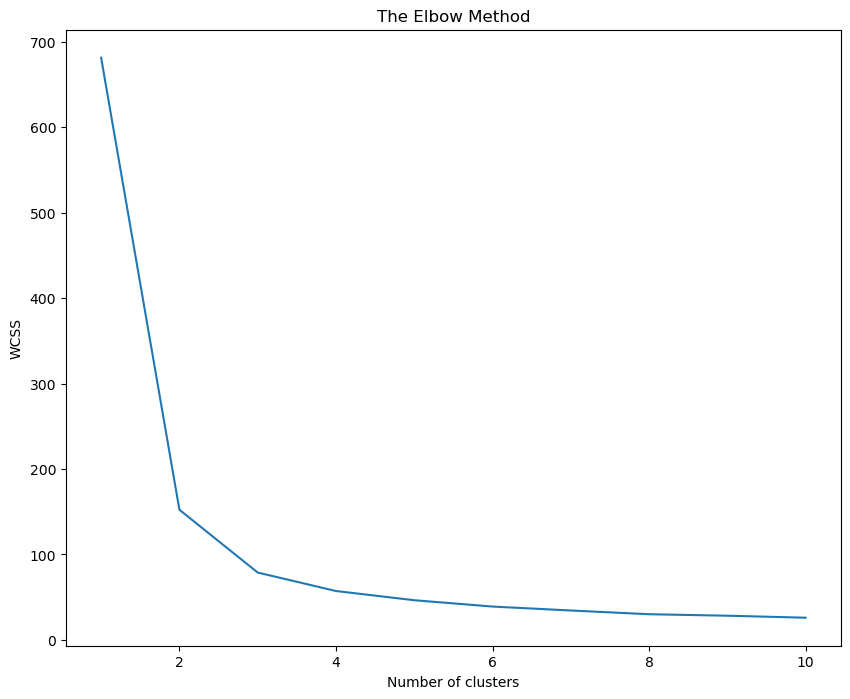

None


In [60]:
#Plot the Elbow chart
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
print(plt.show())

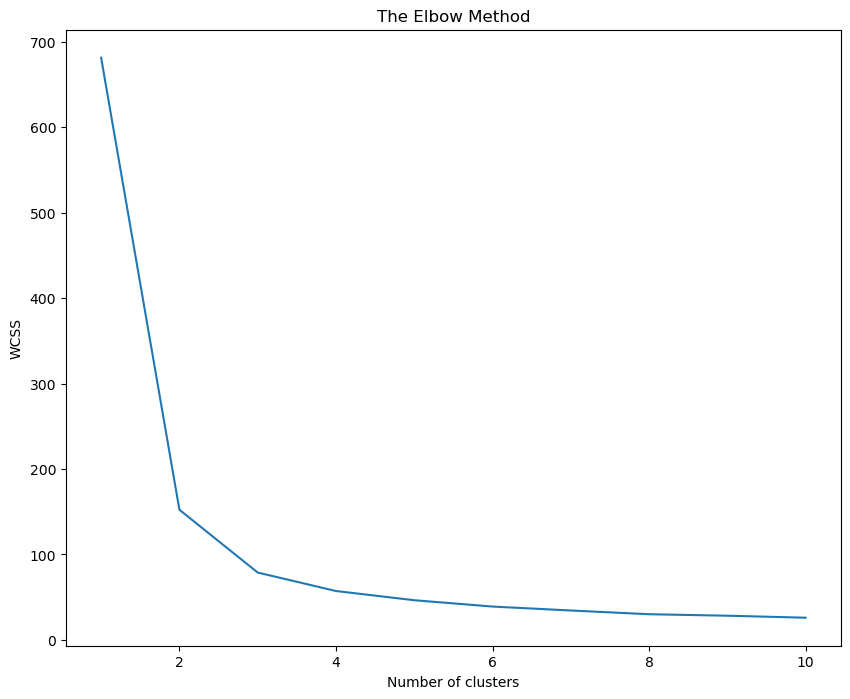

None


In [61]:
#Let's plot this again, changing the size
plt.rcParams['figure.figsize'] = 10, 8

#Plot the Elbow chart
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
print(plt.show())

### Question: What is the best Cluster number to use?
#### Change the code below for your number of clusters

In [62]:
#Now let's create the final Cluster model for the Iris dataset
#change the value for number of clusters
num_clusters = 3

ran=8
kmeans_model = KMeans(n_clusters=num_clusters,init='k-means++',max_iter=300,n_init=10,random_state=ran) 


In [63]:
#Next, apply that new Clustering model to the dataset
y_Kmeans = kmeans_model.fit_predict(df)

#Display the results
y_Kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [64]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
#Add the cluster number to the DF
y_df = pd.DataFrame(kmeans_model.predict(df))
df2 = df
df2["CLUSTER_NUM"] = y_df
#Display the new DF
df2.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLUSTER_NUM
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [66]:
kmeans_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

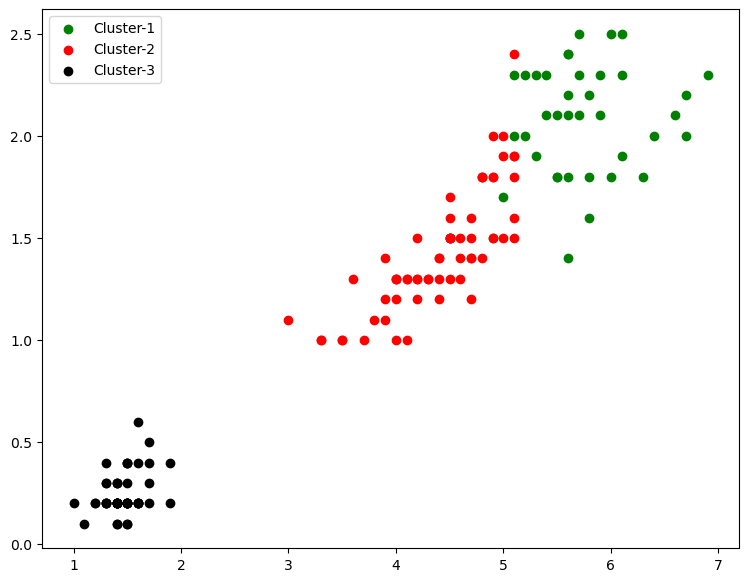

In [67]:
plt.rcParams['figure.figsize'] = 9, 7

plot_df1 = df2[df2.CLUSTER_NUM==0]
plot_df2 = df2[df2.CLUSTER_NUM==1]
plot_df3 = df2[df2.CLUSTER_NUM==2]
plt.scatter(plot_df1['petal length (cm)'], plot_df1['petal width (cm)'], color='green', label='Cluster-1')

plt.scatter(plot_df2['petal length (cm)'], plot_df2['petal width (cm)'],color='red', label='Cluster-2')
plt.scatter(plot_df3['petal length (cm)'], plot_df3['petal width (cm)'],color='black', label='Cluster-3')
plt.legend()

#### Exercises
#### Add a chart title, x-axis title and y-axis title
#### Change the columns used for the above chart to see what different it makes. 
#### Is there a better selection of columns to get a better chart and for explainablility

#### ----------
#### Calculate & Display the Silhouette values
#### ----------
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

For n_clusters = 2 The average silhouette_score is : 0.6812480399631204
For n_clusters = 3 The average silhouette_score is : 0.6128676734836785
For n_clusters = 4 The average silhouette_score is : 0.5623519391324965
For n_clusters = 5 The average silhouette_score is : 0.41317442932087506
For n_clusters = 6 The average silhouette_score is : 0.3934752726251412
For n_clusters = 7 The average silhouette_score is : 0.32808478719571044
For n_clusters = 8 The average silhouette_score is : 0.3509907799984096


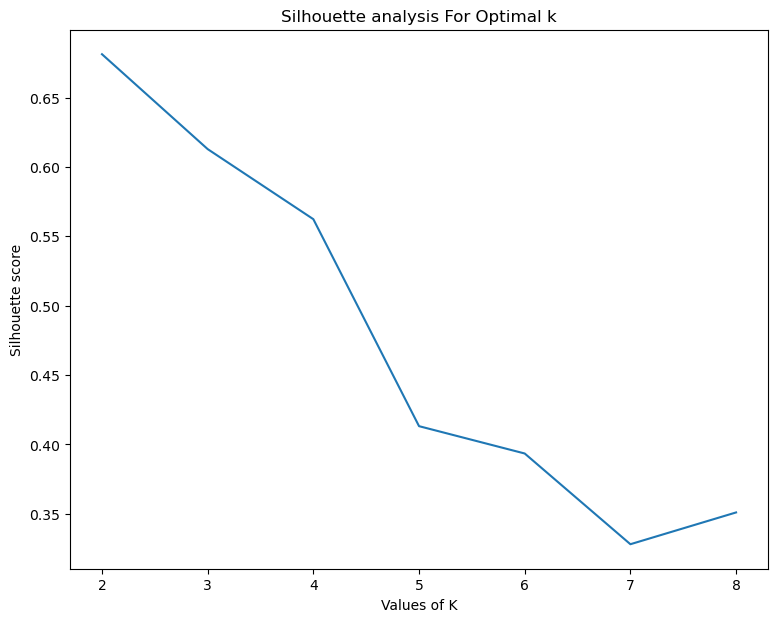

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=142)
 kmeans.fit(df2)
 cluster_labels = kmeans.labels_
 
 print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_score(df2, cluster_labels))
 # silhouette score
 silhouette_avg.append(silhouette_score(df2, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6812480399631204
For n_clusters = 3 The average silhouette_score is : 0.6128676734836785
For n_clusters = 4 The average silhouette_score is : 0.5623519391324965
For n_clusters = 5 The average silhouette_score is : 0.41317442932087506
For n_clusters = 6 The average silhouette_score is : 0.3934752726251412


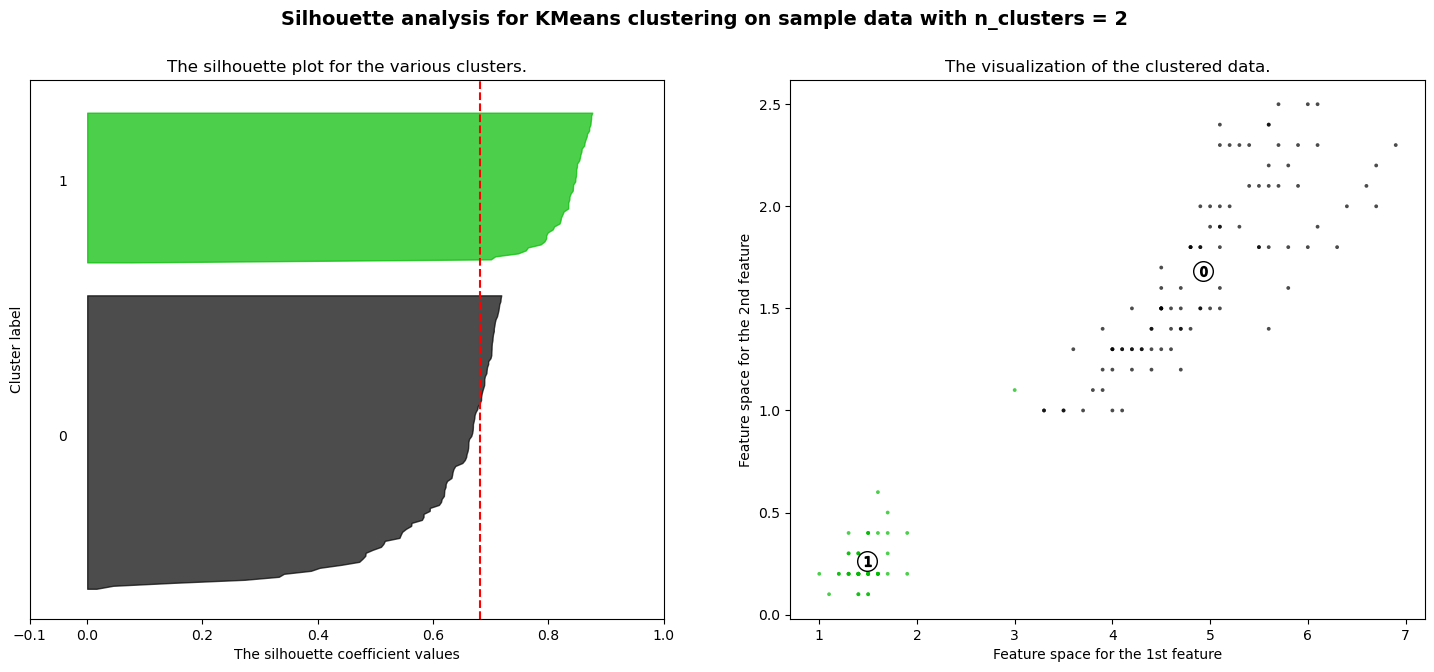

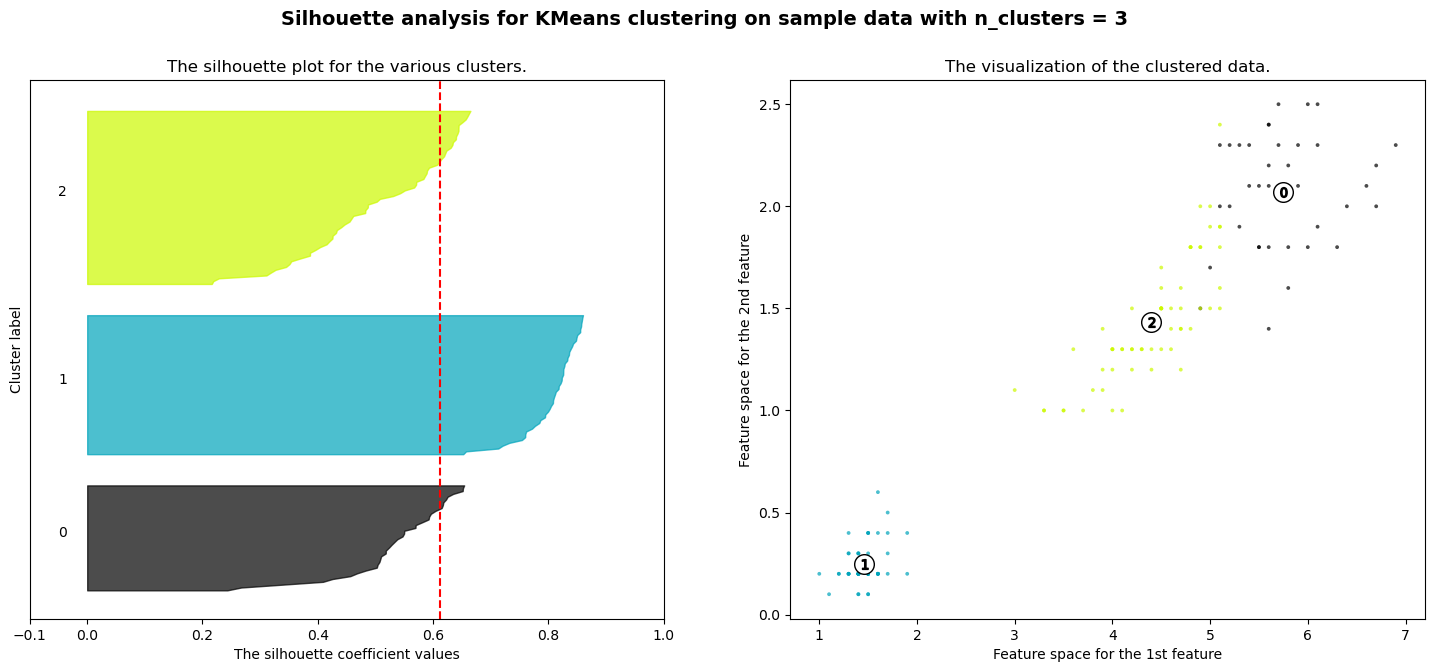

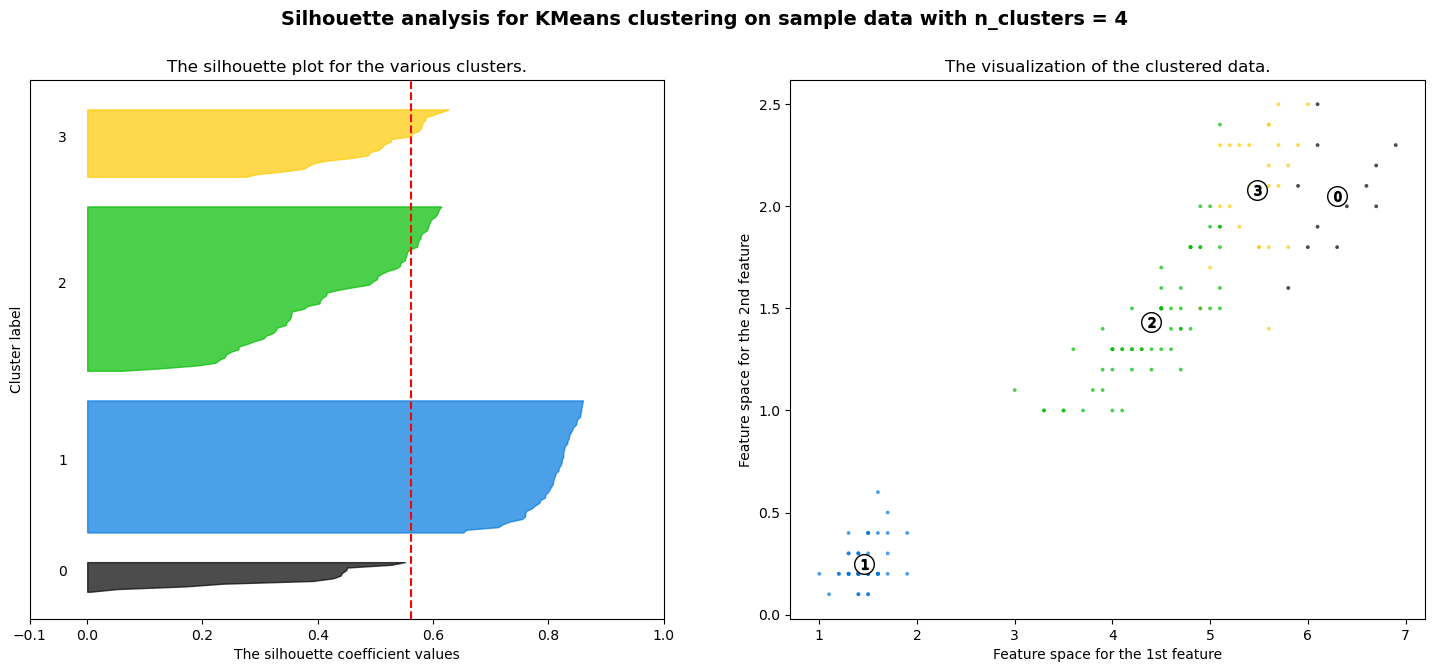

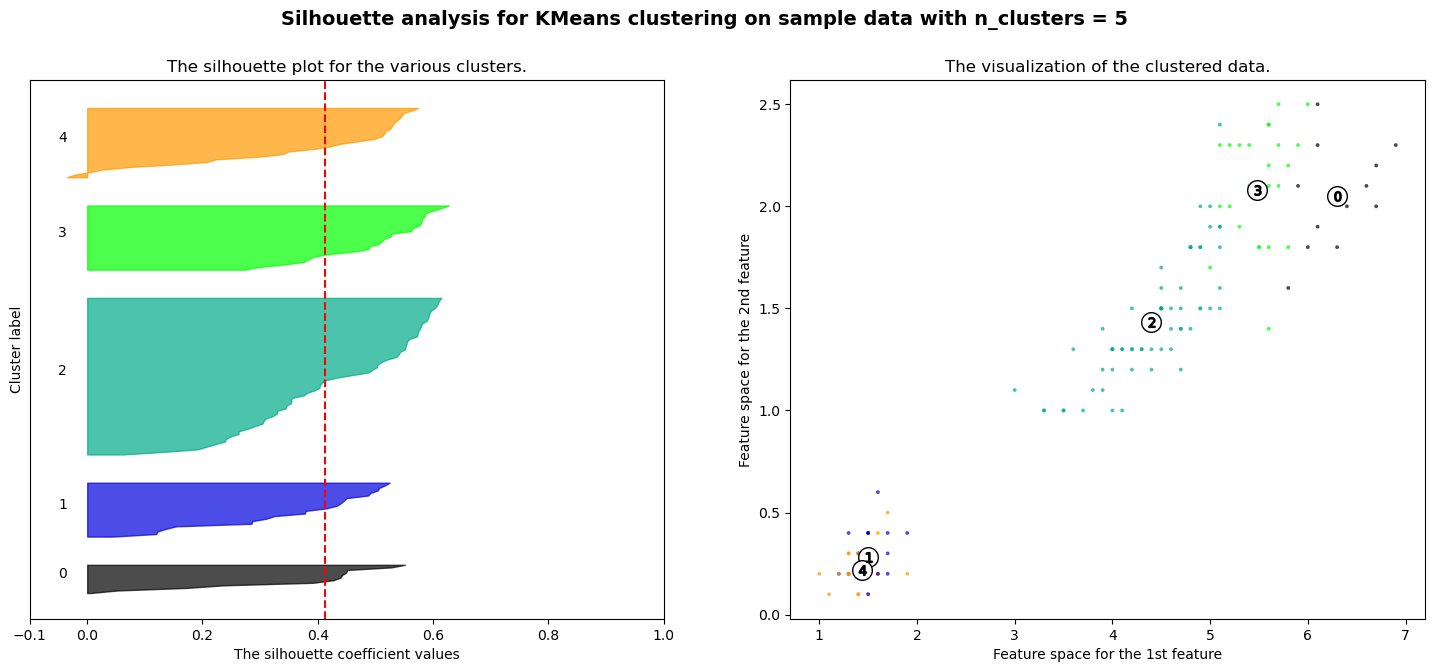

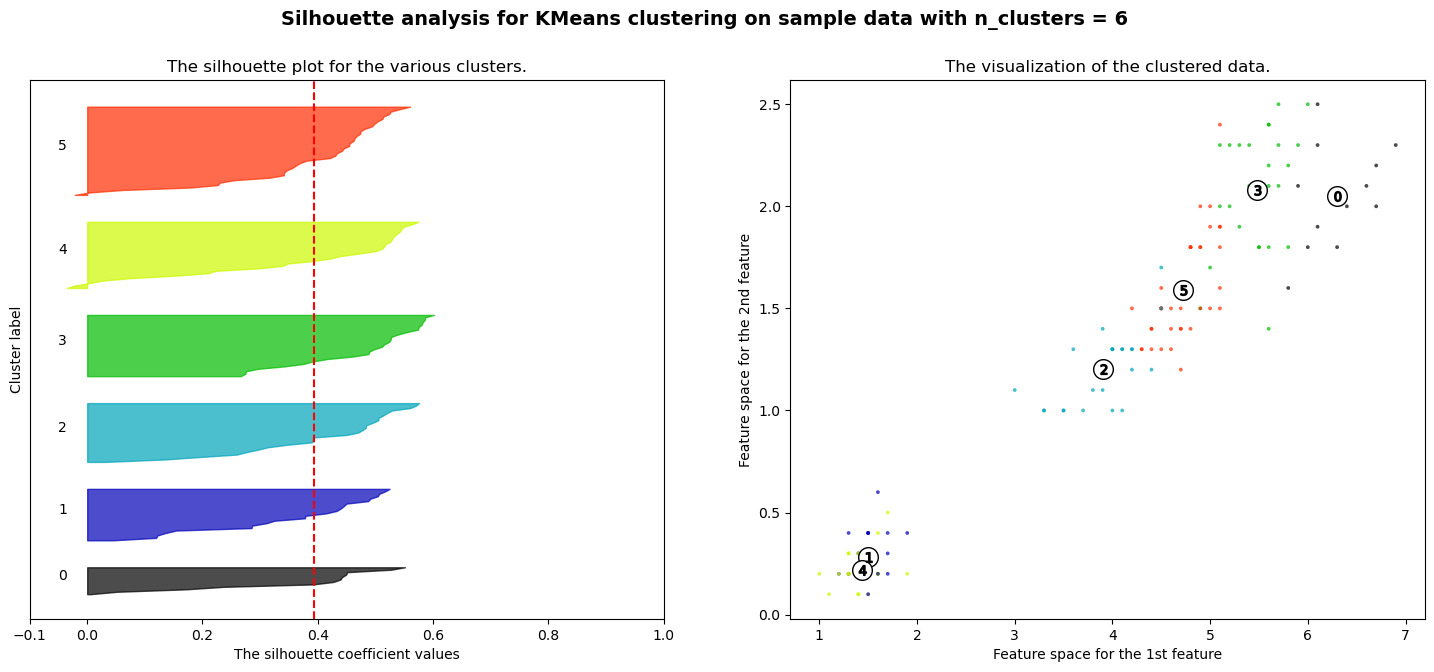

In [69]:
import matplotlib.cm as cm

X = df2
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++' , random_state=142)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['petal length (cm)'], X['petal width (cm)'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 2],
        centers[:, 3],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[3], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()